# Cosmic Watch Data Analysis

# Introduction
This code is at the begining stages, the goal is to create an analysis tool for cosmic watch data that is code based and readable to give students a place to start and the ability to read and change the code so the code is not another black box for the cosmic watch.

In [1]:
# imports some software packages we'll use
import pandas as pd #Pandas lets us name the columns of our data more likea spread sheet.
import numpy as np #Numpy is used by pandas for calculatiions
%matplotlib inline
import matplotlib as mpl #For ploting data
import matplotlib.pyplot as plt #For typing less when poloting data
import math #for other math we might do.

inline_rc = dict(mpl.rcParams) #Sets Parameters for plots.


data = pd.read_csv('CW_B2023_Jul_19_092453.csv')

data

,Event,RunTime,ADC,SiPM,DownTime,Temp
0,1,381,389,81.58,726,26.81
1,2,502,238,40.82,730,26.59
2,3,643,482,129.60,734,27.13
3,4,1508,287,50.23,923,26.48
4,5,1563,338,62.67,927,26.81
...,...,...,...,...,...,...
295171,295172,171321367,363,71.20,33571864,26.70
295172,295173,171322481,179,30.55,33572072,26.91
295173,295174,171323655,176,30.09,33572260,27.02
295174,295175,171323844,63,17.91,33572264,26.81


Next we are going to plot a hystogram of the event voltages, in part to see that the data was importated correctly, and also to see how it compares to other data sets.

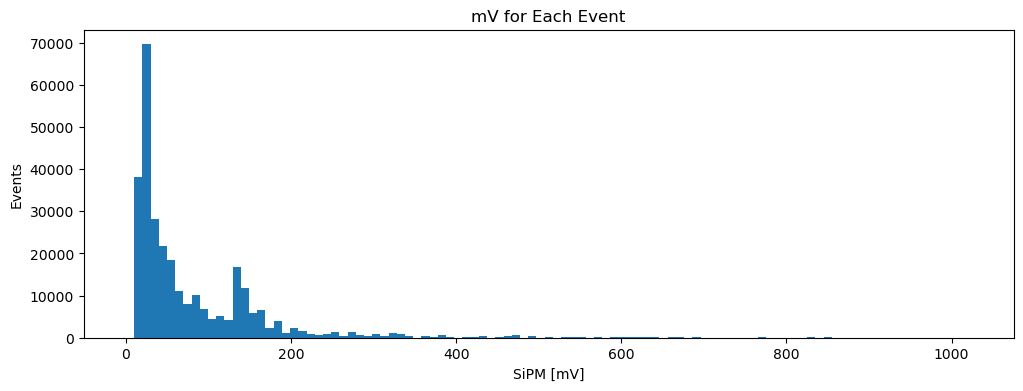

In [13]:
# This makes a histogram of that totally useless calculation above
plt.figure(figsize=(12,4))
plt.hist(data.SiPM, bins=103, range=[0,1024], log=False)
plt.title("ADC Value for Each Event")
plt.xlabel("SiPM [mV]")
plt.ylabel("Events");

It takes time for the CosmicWatch's processor to evaluate and report on events, this time is considered down time. The system reports out the down time, we need to use this to calculate the up time, the time when the Cosmic Watch was waiting for a hit. Using the up time we can calculate a rate for every event.

In [3]:
data['UpTime'] = (data.RunTime - data.DownTime)
data['Time'] = pd.to_timedelta(data.UpTime, unit='ms')
data['Minute']= (data.UpTime/(60000))
data.Minute = (data.Minute).astype(int)
data['avgRate'] = data.Event/(data.UpTime/1000)
data

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute,avgRate
0,1,381,389,81.58,726,26.81,-345,-1 days +23:59:59.655000,0,-2.898551
1,2,502,238,40.82,730,26.59,-228,-1 days +23:59:59.772000,0,-8.771930
2,3,643,482,129.60,734,27.13,-91,-1 days +23:59:59.909000,0,-32.967033
3,4,1508,287,50.23,923,26.48,585,0 days 00:00:00.585000,0,6.837607
4,5,1563,338,62.67,927,26.81,636,0 days 00:00:00.636000,0,7.861635
...,...,...,...,...,...,...,...,...,...,...
295171,295172,171321367,363,71.20,33571864,26.70,137749503,1 days 14:15:49.503000,2295,2.142817
295172,295173,171322481,179,30.55,33572072,26.91,137750409,1 days 14:15:50.409000,2295,2.142810
295173,295174,171323655,176,30.09,33572260,27.02,137751395,1 days 14:15:51.395000,2295,2.142802
295174,295175,171323844,63,17.91,33572264,26.81,137751580,1 days 14:15:51.580000,2295,2.142807


In [4]:
Data1Min = data.drop_duplicates(subset=['Minute'], keep='first')
Data1Min = Data1Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,381,726,-345,-1 days +23:59:59.655000,0,-2.898551
129,130,75983,15127,60856,0 days 00:01:00.856000,1,2.136190
242,243,149476,29342,120134,0 days 00:02:00.134000,2,2.022741
381,382,224983,43836,181147,0 days 00:03:01.147000,3,2.108785
504,505,297922,57893,240029,0 days 00:04:00.029000,4,2.103912
...,...,...,...,...,...,...,...
294588,294589,170963192,33501756,137461436,1 days 14:11:01.436000,2291,2.143067
294727,294728,171036966,33516204,137520762,1 days 14:12:00.762000,2292,2.143153
294829,294830,171110878,33530640,137580238,1 days 14:13:00.238000,2293,2.142968
294954,294955,171185527,33545430,137640097,1 days 14:14:00.097000,2294,2.142944


In [5]:
Data1Min['DeltaCount'] = Data1Min.Event - Data1Min.Event.shift(1)

Data1Min['DeltaUpTime'] = Data1Min.UpTime - Data1Min.UpTime.shift(1)

Data1Min['Rate'] = Data1Min.DeltaCount / (Data1Min.DeltaUpTime /1000)
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,381,726,-345,-1 days +23:59:59.655000,0,-2.898551,NaN,NaN,NaN
129,130,75983,15127,60856,0 days 00:01:00.856000,1,2.136190,129.0,61201.0,2.107809
242,243,149476,29342,120134,0 days 00:02:00.134000,2,2.022741,113.0,59278.0,1.906272
381,382,224983,43836,181147,0 days 00:03:01.147000,3,2.108785,139.0,61013.0,2.278203
504,505,297922,57893,240029,0 days 00:04:00.029000,4,2.103912,123.0,58882.0,2.088924
...,...,...,...,...,...,...,...,...,...,...
294588,294589,170963192,33501756,137461436,1 days 14:11:01.436000,2291,2.143067,117.0,60728.0,1.926624
294727,294728,171036966,33516204,137520762,1 days 14:12:00.762000,2292,2.143153,139.0,59326.0,2.342986
294829,294830,171110878,33530640,137580238,1 days 14:13:00.238000,2293,2.142968,102.0,59476.0,1.714977
294954,294955,171185527,33545430,137640097,1 days 14:14:00.097000,2294,2.142944,125.0,59859.0,2.088241


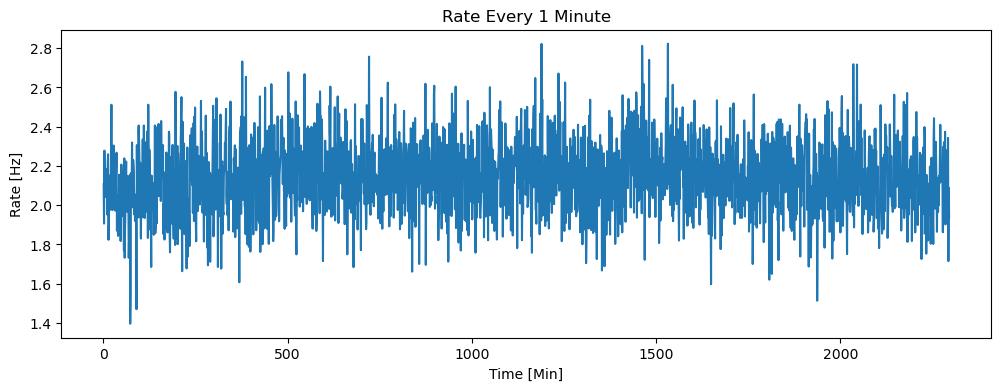

In [6]:
plt.figure(figsize=(12,4))
plt.plot(Data1Min.Minute,Data1Min.Rate)
plt.title("Rate Every 1 Minute")
plt.xlabel("Time [Min]")
plt.ylabel("Rate [Hz]");

In [7]:
#Data5Min = pd.DataFrame(columns=['Event','DownTime','Uptime','Minute'])
Data5Min = Data1Min.query('Minute % 5 == 0')

Data5Min = Data5Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,381,726,-345,-1 days +23:59:59.655000,0,-2.898551
628,629,372766,72351,300415,0 days 00:05:00.415000,5,2.093770
1257,1258,744477,144101,600376,0 days 00:10:00.376000,10,2.095354
1866,1867,1115884,215688,900196,0 days 00:15:00.196000,15,2.073993
2486,2487,1487780,287558,1200222,0 days 00:20:00.222000,20,2.072117
...,...,...,...,...,...,...,...
292534,292535,169767275,33265926,136501349,1 days 13:55:01.349000,2275,2.143092
293168,293169,170139741,33339188,136800553,1 days 14:00:00.553000,2280,2.143040
293827,293828,170513687,33413170,137100517,1 days 14:05:00.517000,2285,2.143157
294471,294472,170887570,33486862,137400708,1 days 14:10:00.708000,2290,2.143162


In [8]:
Data5Min['DeltaCount'] = Data5Min.Event - Data5Min.Event.shift(1)
Data5Min['DeltaUpTime'] = Data5Min.UpTime - Data5Min.UpTime.shift(1)
Data5Min['Rate'] = Data5Min.DeltaCount / (Data5Min.DeltaUpTime /1000)


Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,381,726,-345,-1 days +23:59:59.655000,0,-2.898551,NaN,NaN,NaN
628,629,372766,72351,300415,0 days 00:05:00.415000,5,2.093770,628.0,300760.0,2.088044
1257,1258,744477,144101,600376,0 days 00:10:00.376000,10,2.095354,629.0,299961.0,2.096939
1866,1867,1115884,215688,900196,0 days 00:15:00.196000,15,2.073993,609.0,299820.0,2.031219
2486,2487,1487780,287558,1200222,0 days 00:20:00.222000,20,2.072117,620.0,300026.0,2.066488
...,...,...,...,...,...,...,...,...,...,...
292534,292535,169767275,33265926,136501349,1 days 13:55:01.349000,2275,2.143092,676.0,301049.0,2.245482
293168,293169,170139741,33339188,136800553,1 days 14:00:00.553000,2280,2.143040,634.0,299204.0,2.118956
293827,293828,170513687,33413170,137100517,1 days 14:05:00.517000,2285,2.143157,659.0,299964.0,2.196930
294471,294472,170887570,33486862,137400708,1 days 14:10:00.708000,2290,2.143162,644.0,300191.0,2.145301


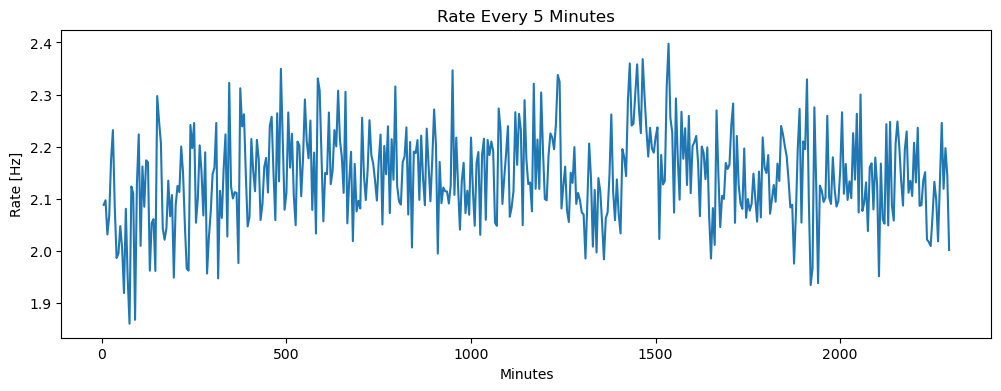

In [9]:
plt.figure(figsize=(12,4))
plt.plot(Data5Min.Minute,Data5Min.Rate)
plt.title("Rate Every 5 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");

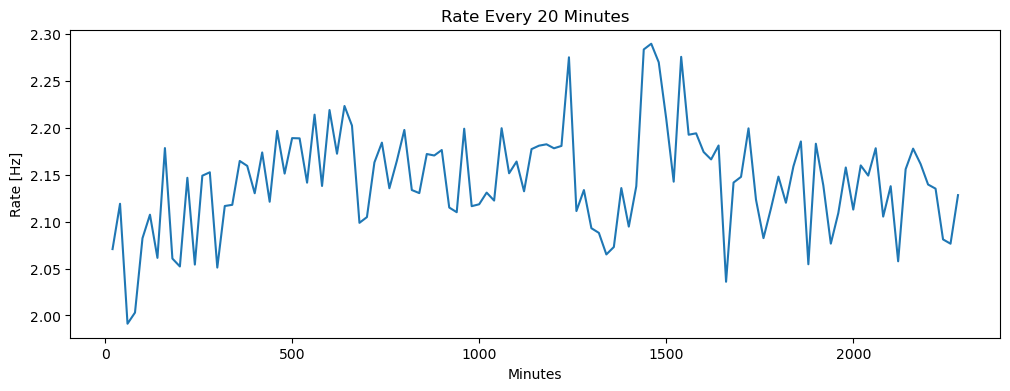

In [12]:
Data20Min = Data1Min.query('Minute % 20 == 0')

Data20Min = Data20Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data20Min['DeltaCount'] = Data20Min.Event - Data20Min.Event.shift(1)

Data20Min['DeltaUpTime'] = Data20Min.UpTime - Data20Min.UpTime.shift(1)

Data20Min['Rate'] = Data20Min.DeltaCount / (Data20Min.DeltaUpTime /1000)

plt.figure(figsize=(12,4))
plt.plot(Data20Min.Minute,Data20Min.Rate)
plt.title("Rate Every 20 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");